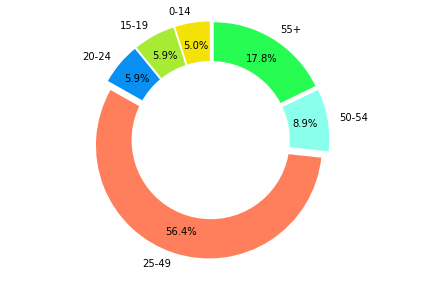

In [6]:
import pandas as pd; pd.set_option('max_columns', 6)
import matplotlib
import matplotlib.pyplot as plt
import json
import urllib.request

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['0-14', '15-19', '20-24', '25-49', '50-54', '55+']
sizes = [4.95, 5.94, 5.94, 56.44, 8.91, 17.82]
explode = (0.05,0.05, 0.05, 0.05, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

colors = ['#f2e207', '#a8eb34', '#0790f2', '#ff7f5c', '#8affeb', '#26fc51']

fig1, ax1, = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90, pctdistance=0.8)# Equal aspect ratio ensures that pie is drawn as a circle

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


ax1.axis('equal')
plt.tight_layout()
plt.show()

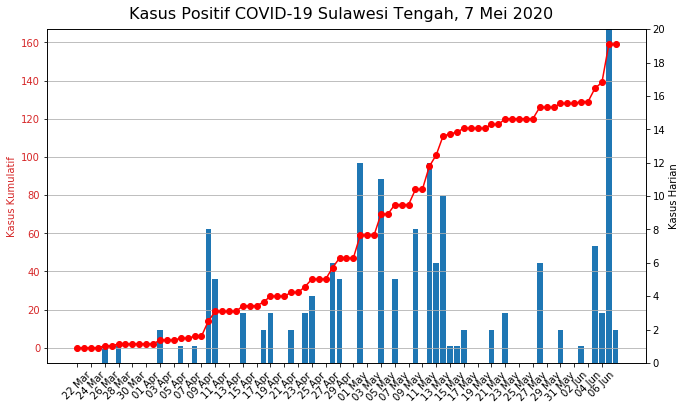

<Figure size 432x288 with 0 Axes>

In [7]:
from matplotlib.pyplot import figure
from matplotlib.pyplot import grid

url_statistik = "https://banuacoders.com/api/pico/statistik"
data_statistik = urllib.request.urlopen(url_statistik).read().decode()
dict_statistik = json.loads(data_statistik)

nbOfDays = len(dict_statistik['data'])

pure_data = dict_statistik['data'];

total_positive = []
total_recovered = []
total_death = []
total_rawat = []
daily_positive = []
date = []

for i in range(nbOfDays):
    total_positive.append(pure_data[i]['cumulative_positive'])
    total_recovered.append(pure_data[i]['cumulative_recovered'])
    total_death.append(pure_data[i]['cumulative_death'])
    total_rawat.append(pure_data[i]['cumulative_positive']-pure_data[i]['cumulative_death']-pure_data[i]['cumulative_recovered'])
    
    daily_positive.append(pure_data[i]['positive'])
    if(i==52):
        date_with_year = "13 May 2020"
    else:
        date_with_year = pure_data[i]['date']
    date_splitted = date_with_year.split()
    date.append(date_splitted[0] + " " + date_splitted[1])
        
positive_add = 159
recovered_add = 93
death_add = 4
total_positive.append(positive_add)
total_recovered.append(recovered_add)
total_death.append(death_add)
total_rawat.append(positive_add-recovered_add-death_add)

daily_positive.append(2)
date_with_year = "7 Juni 2020"
date_splitted = date_with_year.split()
date.append(date_splitted[0] + date_splitted[1])
    
fig, ax1 = plt.subplots()
fig.suptitle('Kasus Positif COVID-19 Sulawesi Tengah, ' + date_splitted[0] + " Mei " + date_splitted[2], fontsize=16, y = 1)

color = 'tab:red'
ax1.set_ylabel('Kasus Kumulatif', color=color)
ax1.plot(date, total_positive, '-or')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'k'
ax2.set_ylabel('Kasus Harian', color=color)  # we already handled the x-label with ax1
ax2.set_ylim([0, 20])
yint = range(0, 21, 2)
matplotlib.pyplot.yticks(yint)
matplotlib.rcParams.update({'font.size': 10})
ax2.bar(date, daily_positive, color='tab:blue')
ax2.tick_params(axis='y', labelcolor=color)

ax2.set_zorder(1)
ax1.set_zorder(ax2.get_zorder()+1)
ax1.grid(axis='y')
ax1.patch.set_visible(False)
ax2.patch.set_visible(True)

#plt.bar(date, daily_positive)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45)
xint = range(0, nbOfDays, 2)
matplotlib.pyplot.xticks(xint)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_size_inches(w=16/1.5,h=9/1.5)
plt.show()
plt.savefig('kasus_positif.png')

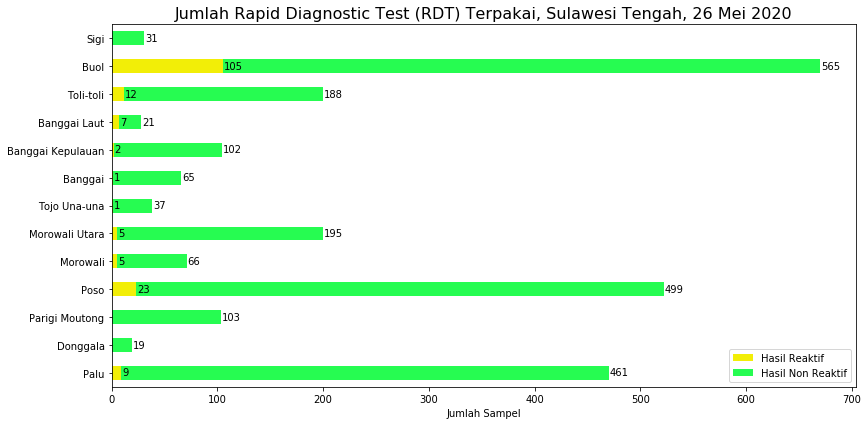

In [8]:
jumlah_sampel_RDT = [470, 19, 103, 522, 71, 200, 38, 66, 104, 28, 200, 670, 31];
sampel_RDT_reaktif = [9, 0, 0, 23, 5, 5, 1, 1, 2, 7, 12, 105, 0];
sampel_RDT_non_reaktif = [];

for i in range(len(jumlah_sampel_RDT)):
    sampel_RDT_non_reaktif.append(jumlah_sampel_RDT[i] - sampel_RDT_reaktif[i])

index = ["Palu", "Donggala", "Parigi Moutong", "Poso", 
         "Morowali", "Morowali Utara", "Tojo Una-una", "Banggai", "Banggai Kepulauan",
         "Banggai Laut", "Toli-toli", "Buol", "Sigi"];

df = pd.DataFrame({'Hasil Reaktif': sampel_RDT_reaktif,
                   'Hasil Non Reaktif': sampel_RDT_non_reaktif}
                   ,index=index)

colors = ['#f2ee07','#26fc51']
ax = df.plot(kind='barh', stacked=True, color=colors)

plt.gcf().set_size_inches(w=20/1.5,h=10/1.5)

plt.title('Jumlah Rapid Diagnostic Test (RDT) Terpakai, Sulawesi Tengah, ' + "26" + " Mei " + date_splitted[2], fontsize=16, y = 1)
plt.xlabel('Jumlah Sampel')
i=0
#ax.patch.set_facecolor('#eeeeee')
#ax.patch.set_alpha(0.0)

for rowNum,row in df.iterrows():
    xpos = 0
    for val in row:
        xpos += val
        if(val!=0):
            ax.text(xpos + 1, i-0.1, str(val), color='black')
    i+=1
    xpos = 0

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Reaktif', 'Non-Reaktif'

total_RDT_reaktif = 0;
total_RDT_non_reaktif = 0;
total_RDT = 0;

for i in range(len(sampel_RDT_reaktif)):
    total_RDT_reaktif += sampel_RDT_reaktif[i];
    total_RDT_non_reaktif += sampel_RDT_non_reaktif[i];
    total_RDT += jumlah_sampel_RDT[i];
    
sizes = [total_RDT_reaktif, total_RDT_non_reaktif]
explode = (0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

colors = ['#f2e207','#26fc51','#ff7f5c']

fig1, ax1 = plt.subplots()

def absolute_value(val):
    a  = numpy.round(val/100.*sizes.sum(), 0)
    return a

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=90, pctdistance=0.8)# Equal aspect ratio ensures that pie is drawn as a circle

plt.gcf().set_size_inches(w=20/1.5,h=10/1.5)
fig.gca().add_artist(centre_circle)
plt.title('Persentase Hasil Rapid Diagnostic Test di Sulawesi Tengah', fontsize=16, y = -0.1)
ax1.axis('equal')
plt.tight_layout()
plt.show()

In [ ]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ["Palu", "Donggala", "Parigi Moutong", "Poso", 
         "Morowali", "Morowali Utara", "Tojo Una-una", "Banggai", "Banggai Kepulauan",
         "Banggai Laut", "Toli-toli", "Buol", "Sigi"];

sizes = jumlah_sampel_RDT
colors = ['#FFC154', '#EC6B56', '#47B39C',  '#FFC154', '#EC6B56']
explode = (0.05, 0.1, 0.05, 0.05, 0.05, 0.05, 0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1, = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=False, startangle=75, pctdistance=0.8)# Equal aspect ratio ensures that pie is drawn as a circle

#draw circle
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sebaran Penggunaan Rapid Diagnostic Test di Sulawesi Tengah', fontsize=16, y = -0.1)

ax1.axis('equal')
plt.gcf().set_size_inches(w=20/1.5,h=10/1.5)
plt.tight_layout()
plt.show()

In [ ]:
jumlah_sampel_PCR = 562;
sampel_PCR_positif = 120;
sampel_PCR_negatif = 281;
sampel_PCR_proses = 161;

labels = 'Positif', 'Negatif', 'Menunggu Lab'
sizes = [sampel_PCR_positif, sampel_PCR_negatif, sampel_PCR_proses];

explode = (0.05, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

colors = ['#ff7f5c','#26fc51','#f2e207']

fig1, ax1 = plt.subplots()

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} orang)".format(pct, absolute)

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes),
        shadow=False, startangle=90, pctdistance=0.8)# Equal aspect ratio ensures that pie is drawn as a circle

plt.gcf().set_size_inches(w=20/1.5,h=10/1.5)
plt.title('Persentase Sampel Swab Test di Sulawesi Tengah', fontsize=16, y = -0.1)
ax1.axis('equal')
plt.tight_layout()
plt.show()